In [1]:
import yfinance as yahoo
import pandas as pd
import numpy as np
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
stocks = ['AZN', 'BMY','MRK','PG','COST','WMT','ABEV','SIEGY','MMM','HON','HMY',
         'PBR','X','NFLX','BABA','NVDA','MSFT','AAPL','ADBE','RTX','LMT','DESP', 'WFC', 'BBD']


In [3]:
df = yahoo.download(stocks,period="1y",interval="60m")['Adj Close'].fillna(method='ffill')
df = df.fillna(method='ffill')
start, end = df.iloc[0,:], df.iloc[-1,:]
renta = (end / start)
renta = renta.sort_values(axis=0,ascending=False)
renta

[*********************100%***********************]  24 of 24 completed


AAPL    NaN
ABEV    NaN
ADBE    NaN
AZN     NaN
BABA    NaN
BBD     NaN
BMY     NaN
COST    NaN
DESP    NaN
HMY     NaN
HON     NaN
LMT     NaN
MMM     NaN
MRK     NaN
MSFT    NaN
NFLX    NaN
NVDA    NaN
PBR     NaN
PG      NaN
RTX     NaN
SIEGY   NaN
WFC     NaN
WMT     NaN
X       NaN
dtype: float64

In [4]:
df

,AAPL,ABEV,ADBE,AZN,BABA,BBD,BMY,COST,DESP,HMY,...,MSFT,NFLX,NVDA,PBR,PG,RTX,SIEGY,WFC,WMT,X
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-08-14 09:30:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-15 09:30:00-04:00,202.559998,4.670,283.355011,44.139999,166.710007,7.518182,45.674999,270.510010,10.910,2.9765,...,133.395004,295.630005,149.380005,13.360,116.989998,NaN,47.150002,44.009998,110.720001,11.060
2019-08-15 10:30:00-04:00,201.270004,4.673,282.859985,44.009998,166.210007,7.509091,45.845001,270.859985,10.880,3.0100,...,133.292694,292.487793,148.270004,13.340,117.370003,NaN,47.169998,43.820000,111.750000,11.050
2019-08-15 11:30:00-04:00,201.910004,4.670,282.589996,44.250000,165.050003,7.545455,45.955002,270.899994,10.890,3.0300,...,133.580002,293.454010,148.216797,13.385,117.760002,NaN,47.174999,43.847500,110.839996,11.015
2019-08-15 12:30:00-04:00,202.100006,4.650,283.029999,44.195000,165.690002,7.527272,45.855000,270.510010,10.720,3.0200,...,133.500000,292.979889,148.919998,13.330,117.639999,NaN,47.139999,43.849998,110.894997,11.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-14 11:30:00-04:00,457.636902,2.485,446.549988,55.139999,252.440002,3.930000,63.150002,337.350006,9.000,5.7900,...,208.479996,482.209991,460.790009,8.680,134.910004,64.029999,68.625000,25.325001,132.320099,7.825
2020-08-14 12:30:00-04:00,459.140015,2.450,447.769989,55.165001,253.395004,3.910000,63.145000,337.079987,9.015,5.8200,...,208.649994,482.529999,460.795013,8.645,134.889999,64.023399,68.640503,25.311100,132.604996,7.815
2020-08-14 13:30:00-04:00,457.269989,2.460,446.690002,55.130001,252.789993,3.910000,63.049999,336.899994,9.000,5.8750,...,208.610001,481.575012,459.739990,8.650,135.149994,63.930000,68.570000,25.376699,132.785004,7.855


In [5]:
noa = len(df.columns) #number of assets
weights = np.random.random(noa)
weights /= np.sum(weights)
observations = len(df.index)
alpha = 0.05
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()

In [6]:
def calc_portfolio_VaR(weights, mean_returns, cov, alpha, observations):
    portfolio_return = np.sum(mean_returns * weights) * observations
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(observations)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_var

def min_VaR(mean_returns, cov, alpha, observations):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, alpha, observations)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (-0.3,0.3)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_VaR, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result


In [7]:
min_port_VaR = min_VaR(mean_returns, cov, alpha, observations)

minimal_VaR = pd.DataFrame(index=df.columns)
minimal_VaR['weigths'] = pd.DataFrame([round(x,3) for x in min_port_VaR['x']],index=df.columns)
minimal_VaR.weigths.sort_values(axis=0,ascending=False)

NVDA     0.086
BABA     0.071
DESP     0.069
AAPL     0.065
RTX      0.065
ADBE     0.064
SIEGY    0.064
MSFT     0.063
X        0.054
NFLX     0.051
BMY      0.048
WMT      0.043
HMY      0.043
COST     0.041
MMM      0.038
AZN      0.036
LMT      0.034
HON      0.029
MRK      0.022
PG       0.022
WFC      0.017
PBR     -0.003
BBD     -0.004
ABEV    -0.020
Name: weigths, dtype: float64

In [8]:
portfolio = (df * minimal_VaR.weigths).T.sum()

retorno = portfolio.pct_change().cumsum()

benchmark = df.T.mean() # build an equally weigthed portfolio to use as benchmark

assets_return = df.pct_change().cumsum() # spectrum of the assets returns


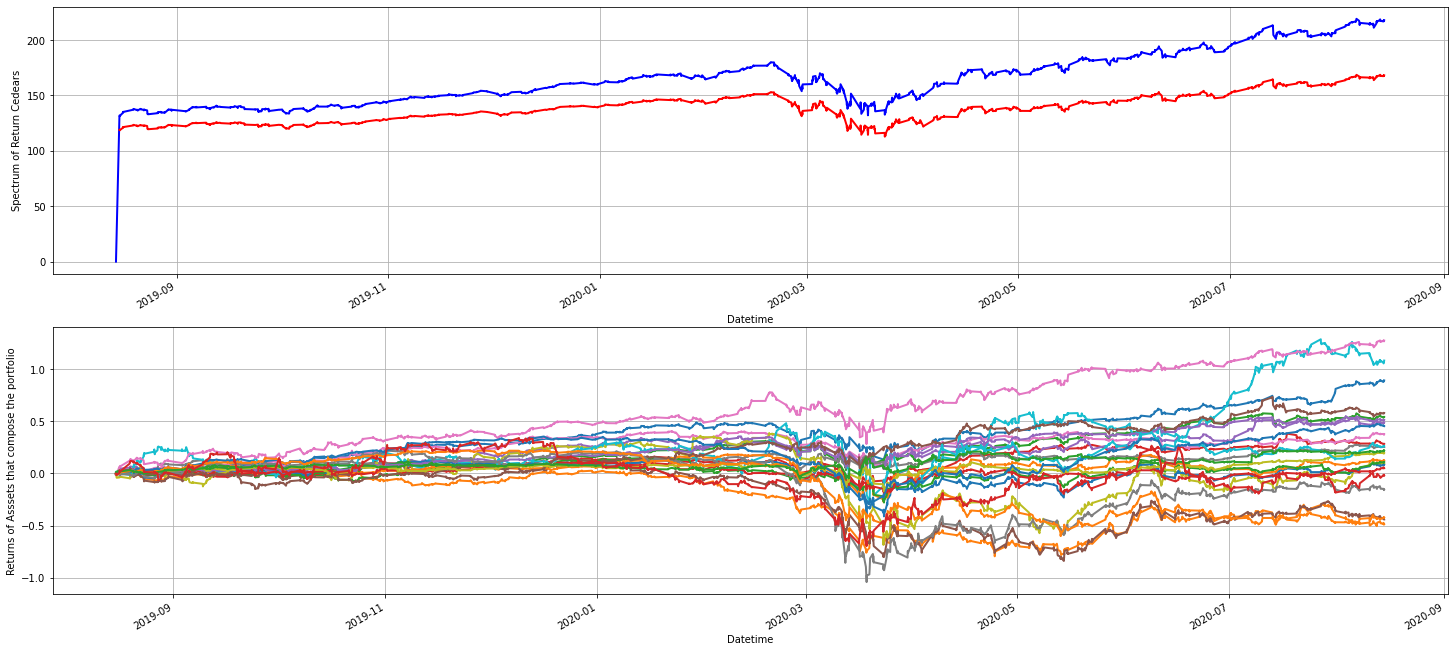

In [9]:
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot(211, ylabel='Spectrum of Return Cedears')
portfolio.plot(ax=ax1, color='b', lw=2.)
benchmark.plot(ax=ax1, color='r', lw=2.)
ax1.grid()
ax2 = fig.add_subplot(212, ylabel='Returns of Asssets that compose the portfolio')
assets_return.plot(ax=ax2, lw=2., legend=False)
ax2.grid()
plt.show()

In [10]:
portfolio, benchmark

(Datetime
 2019-08-14 09:30:00-04:00      0.000000
 2019-08-15 09:30:00-04:00    131.867595
 2019-08-15 10:30:00-04:00    131.583626
 2019-08-15 11:30:00-04:00    131.606710
 2019-08-15 12:30:00-04:00    131.604377
                                 ...    
 2020-08-14 11:30:00-04:00    217.439494
 2020-08-14 12:30:00-04:00    217.687760
 2020-08-14 13:30:00-04:00    217.348228
 2020-08-14 14:30:00-04:00    217.029649
 2020-08-14 15:30:00-04:00    217.844026
 Length: 1768, dtype: float64,
 Datetime
 2019-08-14 09:30:00-04:00           NaN
 2019-08-15 09:30:00-04:00    118.874153
 2019-08-15 10:30:00-04:00    118.736199
 2019-08-15 11:30:00-04:00    118.799077
 2019-08-15 12:30:00-04:00    118.715089
                                 ...    
 2020-08-14 11:30:00-04:00    167.892858
 2020-08-14 12:30:00-04:00    168.023014
 2020-08-14 13:30:00-04:00    167.848612
 2020-08-14 14:30:00-04:00    167.545716
 2020-08-14 15:30:00-04:00    168.080626
 Length: 1768, dtype: float64)

In [11]:
minimal_VaR = pd.DataFrame(index=df.columns)
minimal_VaR['weigths'] = pd.DataFrame([round(x,2) for x in min_port_VaR['x']],index=df.columns)
minimal_VaR.weigths.sort_values(axis=0,ascending=False)

NVDA     0.09
AAPL     0.07
BABA     0.07
DESP     0.07
MSFT     0.06
ADBE     0.06
SIEGY    0.06
RTX      0.06
BMY      0.05
X        0.05
NFLX     0.05
MMM      0.04
WMT      0.04
HMY      0.04
COST     0.04
AZN      0.04
HON      0.03
LMT      0.03
MRK      0.02
PG       0.02
WFC      0.02
PBR     -0.00
BBD     -0.00
ABEV    -0.02
Name: weigths, dtype: float64

In [12]:
portfolio = (df * minimal_VaR.weigths).T.sum()
portfolio

Datetime
2019-08-14 09:30:00-04:00      0.000000
2019-08-15 09:30:00-04:00    129.720245
2019-08-15 10:30:00-04:00    129.420362
2019-08-15 11:30:00-04:00    129.444463
2019-08-15 12:30:00-04:00    129.446141
                                ...    
2020-08-14 11:30:00-04:00    216.002585
2020-08-14 12:30:00-04:00    216.255577
2020-08-14 13:30:00-04:00    215.906833
2020-08-14 14:30:00-04:00    215.595025
2020-08-14 15:30:00-04:00    216.427501
Length: 1768, dtype: float64

In [13]:
data = df

# Calculate the returns of instruments, statistics & correlation
returns = (data - data.shift(1))/ data.shift(1)# get the returns for every serie

statistics = returns.describe().T

statistics['mad'] = returns.mad()

statistics['skew'] = returns.skew()

statistics['kurtosis'] = returns.kurtosis()

statistics = statistics.T

correlation = returns.corr() # correlation

covariance = returns.cov()  # covariance

# Calculate the deltas of the instruments as the weights assigned multiplied by their correlations (elasticity)
instruments = pd.DataFrame(index= data.columns)
instruments['weigths'] = 1/len(instruments.index) # secure allocation is equal 1
instruments['deltas'] = (instruments.weigths * correlation).sum() # deltas as elasticity of the assets
instruments['Stdev'] = returns.std()
instruments['stress'] = (instruments.deltas * instruments.Stdev) * 3 # stress applied at 4 deviations
instruments['portfolio_stress'] = instruments.stress.sum() # the stress of the portfolio

# Optional, if all the worst events happen at once, must detect the worst deviation of the instruments and apply it simultaneously
poe = (returns / returns.std()).min()
fullstress = sum(instruments.stress.multiply(poe))


In [14]:
instruments

,weigths,deltas,Stdev,stress,portfolio_stress
AAPL,0.041667,0.553725,0.008924,0.014824,0.358073
ABEV,0.041667,0.431575,0.013423,0.017380,0.358073
ADBE,0.041667,0.509891,0.009707,0.014848,0.358073
AZN,0.041667,0.424426,0.008166,0.010397,0.358073
BABA,0.041667,0.458185,0.008738,0.012011,0.358073
BBD,0.041667,0.490156,0.015777,0.023200,0.358073
BMY,0.041667,0.484162,0.007653,0.011115,0.358073
COST,0.041667,0.461024,0.006370,0.008811,0.358073
DESP,0.041667,0.365604,0.017870,0.019600,0.358073
HMY,0.041667,0.220532,0.020950,0.013860,0.358073


In [15]:
poe, fullstress

(AAPL    -11.562016
 ABEV     -8.541903
 ADBE    -12.260784
 AZN     -15.873020
 BABA     -7.833464
 BBD     -11.820282
 BMY      -8.033544
 COST     -9.231110
 DESP    -10.391093
 HMY      -9.599025
 HON     -10.258357
 LMT     -11.565330
 MMM      -9.542160
 MRK      -7.670582
 MSFT    -11.167684
 NFLX     -7.786558
 NVDA     -9.308017
 PBR     -13.371099
 PG       -7.801697
 RTX      -4.765876
 SIEGY   -10.175222
 WFC      -9.727836
 WMT      -8.124437
 X        -7.923868
 dtype: float64,
 -3.5609118046404187)

In [16]:
portfolio = data.T.mean()
portfolio

Datetime
2019-08-14 09:30:00-04:00           NaN
2019-08-15 09:30:00-04:00    118.874153
2019-08-15 10:30:00-04:00    118.736199
2019-08-15 11:30:00-04:00    118.799077
2019-08-15 12:30:00-04:00    118.715089
                                ...    
2020-08-14 11:30:00-04:00    167.892858
2020-08-14 12:30:00-04:00    168.023014
2020-08-14 13:30:00-04:00    167.848612
2020-08-14 14:30:00-04:00    167.545716
2020-08-14 15:30:00-04:00    168.080626
Length: 1768, dtype: float64

In [17]:
portfolio_returns = (portfolio - portfolio.shift(1))/ portfolio.shift(1)

portfolio_stats = portfolio_returns.describe(percentiles=[.01,.05,.10]).T

portfolio_stats['var'] = portfolio_returns.var()

portfolio_stats['skew'] = portfolio_returns.skew()

portfolio_stats['Kurtosis'] = portfolio_returns.kurtosis()

In [18]:
risk = pd.DataFrame(index=data.columns)
risk['numerator'] = (instruments.deltas.multiply(covariance)).sum()
risk['denominator'] = portfolio_returns.std() * (-2.32635) # at 1% of inverse normal dist.
risk['GradVaR'] = -risk.numerator / risk.denominator
risk['CVaRj'] = risk.GradVaR * instruments.deltas # Component VaR of the Risk Factors j
risk['thetai'] = (risk.CVaRj * correlation).sum() # Theta i of the instruments
risk['CVaRi'] = risk.thetai * (1/len(data.columns)) # Component VaR of the Instruments i
risk['totalCVaRi'] = risk.CVaRi.sum() #total CVaR of the portfolio
risk['CVaRattribution'] = risk.CVaRi / risk.totalCVaRi # risk allocation by instrument in the portfolio
risk

,numerator,denominator,GradVaR,CVaRj,thetai,CVaRi,totalCVaRi,CVaRattribution
AAPL,0.000695,-0.015733,0.044207,0.024478,0.325302,0.013554,0.2104,0.064421
ABEV,0.000702,-0.015733,0.044598,0.019247,0.199359,0.008307,0.2104,0.039480
ADBE,0.000641,-0.015733,0.040768,0.020787,0.254383,0.010599,0.2104,0.050377
AZN,0.000364,-0.015733,0.023142,0.009822,0.100051,0.004169,0.2104,0.019814
BABA,0.000474,-0.015733,0.030136,0.013808,0.151838,0.006327,0.2104,0.030069
BBD,0.001068,-0.015733,0.067870,0.033267,0.391346,0.016306,0.2104,0.077500
BMY,0.000454,-0.015733,0.028826,0.013956,0.162171,0.006757,0.2104,0.032116
COST,0.000326,-0.015733,0.020704,0.009545,0.105611,0.004400,0.2104,0.020915
DESP,0.000686,-0.015733,0.043631,0.015952,0.139967,0.005832,0.2104,0.027718
HMY,0.000307,-0.015733,0.019509,0.004302,0.022771,0.000949,0.2104,0.004510


In [19]:
cartera = pd.DataFrame(index=data.columns)
cartera['base'] = instruments.weigths
cartera['CVaRattribution'] = risk.CVaRattribution.sort_values(axis=0,ascending=False)
cartera['new'] = minimal_VaR.weigths
cartera['condition'] = (cartera.base  * cartera.CVaRattribution)
cartera['newrisk'] = (cartera.new  * cartera.CVaRattribution)
cartera['differences'] = (cartera.newrisk - cartera.condition)  # apply this result as a percentage to multiply new weights
cartera['adjustments'] = (cartera.newrisk - cartera.condition) / cartera.condition #ALARM if its negative sum up the difference, 
                                            #if it is positive rest it, you need to have 0
cartera['suggested'] = cartera.new * (1 + cartera.adjustments)   
cartera['tototal'] = cartera.suggested.sum()
cartera['MinCVaR'] = cartera.suggested / cartera.tototal
cartera

,base,CVaRattribution,new,condition,newrisk,differences,adjustments,suggested,tototal,MinCVaR
AAPL,0.041667,0.064421,0.07,0.002684,0.004509,0.001825,0.68,0.1176,1.3464,0.087344
ABEV,0.041667,0.039480,-0.02,0.001645,-0.000790,-0.002435,-1.48,0.0096,1.3464,0.007130
ADBE,0.041667,0.050377,0.06,0.002099,0.003023,0.000924,0.44,0.0864,1.3464,0.064171
AZN,0.041667,0.019814,0.04,0.000826,0.000793,-0.000033,-0.04,0.0384,1.3464,0.028520
BABA,0.041667,0.030069,0.07,0.001253,0.002105,0.000852,0.68,0.1176,1.3464,0.087344
BBD,0.041667,0.077500,-0.00,0.003229,-0.000000,-0.003229,-1.00,-0.0000,1.3464,-0.000000
BMY,0.041667,0.032116,0.05,0.001338,0.001606,0.000268,0.20,0.0600,1.3464,0.044563
COST,0.041667,0.020915,0.04,0.000871,0.000837,-0.000035,-0.04,0.0384,1.3464,0.028520
DESP,0.041667,0.027718,0.07,0.001155,0.001940,0.000785,0.68,0.1176,1.3464,0.087344
HMY,0.041667,0.004510,0.04,0.000188,0.000180,-0.000008,-0.04,0.0384,1.3464,0.028520


In [20]:
propuesta = data * cartera.MinCVaR
propuesta = propuesta.T.sum()

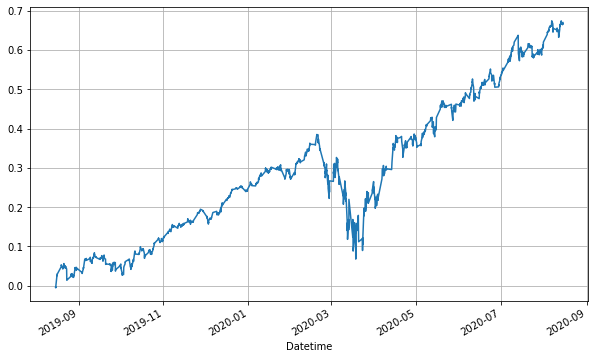

In [21]:
p = propuesta.tail(1767).pct_change().cumsum().plot(figsize=(10,6))
p.grid()

In [22]:
propuesta

Datetime
2019-08-14 09:30:00-04:00      0.000000
2019-08-15 09:30:00-04:00    127.282876
2019-08-15 10:30:00-04:00    126.862406
2019-08-15 11:30:00-04:00    126.855260
2019-08-15 12:30:00-04:00    126.948345
                                ...    
2020-08-14 11:30:00-04:00    235.023831
2020-08-14 12:30:00-04:00    235.337668
2020-08-14 13:30:00-04:00    234.866944
2020-08-14 14:30:00-04:00    234.582783
2020-08-14 15:30:00-04:00    235.634225
Length: 1768, dtype: float64

In [23]:
ponderaciones = cartera.MinCVaR.sort_values(axis=0,ascending=False)
ponderaciones.head(30)

NVDA     0.144385
BABA     0.087344
DESP     0.087344
AAPL     0.087344
SIEGY    0.064171
MSFT     0.064171
ADBE     0.064171
RTX      0.064171
BMY      0.044563
X        0.044563
NFLX     0.044563
WMT      0.028520
COST     0.028520
AZN      0.028520
MMM      0.028520
HMY      0.028520
HON      0.016043
LMT      0.016043
WFC      0.007130
MRK      0.007130
PG       0.007130
ABEV     0.007130
PBR     -0.000000
BBD     -0.000000
Name: MinCVaR, dtype: float64

In [24]:
# Realizo filtro por sector, para evitar concentrarme solo en 1 y diversifico los mismos riesgos
activos = ['NVDA','RTX','BABA','SIEGY','WMT','PFE','AZN','X','HMY','PBR', 'BBD', 'WFC']

In [25]:
df = yahoo.download(activos, period="1y",interval="60m")['Adj Close'].fillna(method='ffill')
noa = len(df.columns)
weigths = np.random.random(noa)
weigths /= np.sum(weigths)
days = 252
alpha = 0.05
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0

[*********************100%***********************]  12 of 12 completed


In [32]:
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,0.3)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, rf)

optimo = pd.DataFrame(index=df.columns)
optimo['weights'] = pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=df.columns)
optimo

,weights
AZN,0.00
BABA,0.12
BBD,0.00
HMY,0.13
NVDA,0.30
PBR,0.00
PFE,0.00
RTX,0.24
SIEGY,0.00
WFC,0.00


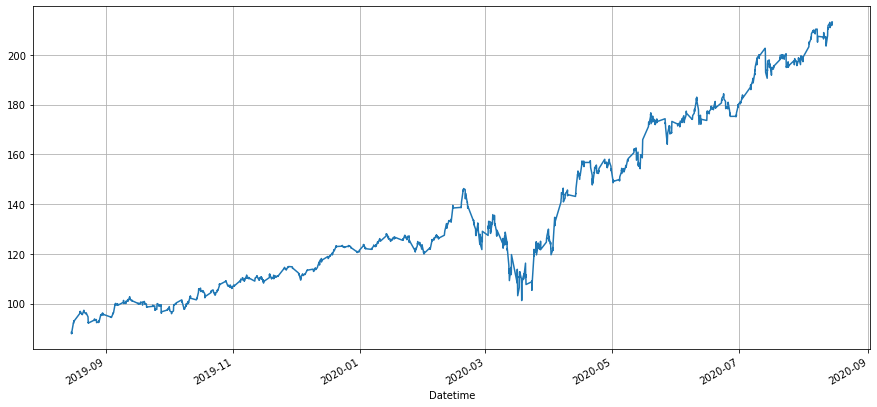

In [33]:
cartera = (df * optimo['weights']).T.sum()
car = cartera.plot(figsize=(15,7))
car.grid()

In [34]:
def calc_portfolio_VaR(weights, mean_returns, cov, alpha, observations):
    portfolio_return = np.sum(mean_returns * weights) * observations
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(observations)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_var

def min_VaR(mean_returns, cov, alpha, observations):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, alpha, observations)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,0.3)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_VaR, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

min_port_VaR = min_VaR(mean_returns, cov, alpha, observations)

minimal_VaR = pd.DataFrame(index=df.columns)
minimal_VaR['weigths'] = pd.DataFrame([round(x,4) for x in min_port_VaR['x']],index=df.columns)

portfolio = (df * minimal_VaR.weigths).T.sum()


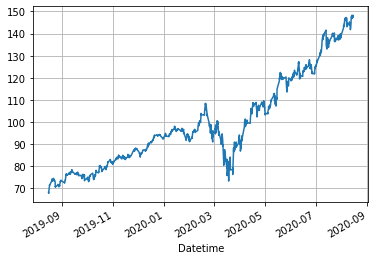

In [35]:
p = portfolio.plot()
p.grid()

In [30]:
minimal_VaR.round(2)

,weigths
AZN,0.05
BABA,0.12
BBD,0.04
HMY,0.19
NVDA,0.19
PBR,0.04
PFE,0.04
RTX,0.10
SIEGY,0.04
WFC,0.05
